In [ ]:
#Social_Network_Ads.csv

**Importing the libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


**Importing the dataset**

In [2]:
df = pd.read_csv("Social_Network_Ads.csv")
df.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df.drop("User ID",axis=1,inplace=True)
df

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


**Splitting the dataset into the Training set and Test set**

In [4]:
from sklearn.model_selection import train_test_split

X = df[['Age', 'EstimatedSalary']]
y = df["Purchased"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

**Feature Scaling**

In [5]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train, y_train)
x_train_scaled = scaler.transform(X_train)
x_test_scaled = scaler.transform(X_test)

**Fitting Decision Tree Classification to the Training set**

In [6]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

**Predicting the Test set results**

In [13]:
y_pred = classifier.predict(X_test)

**Making the Confusion Matrix**

<AxesSubplot: xlabel='Predicted', ylabel='Actual'>

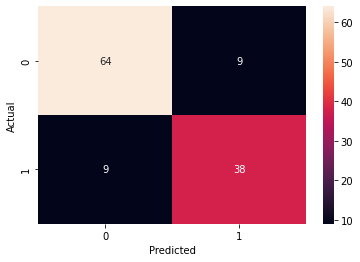

In [20]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

**Visualising the Training set results**

<function matplotlib.pyplot.show(close=None, block=None)>

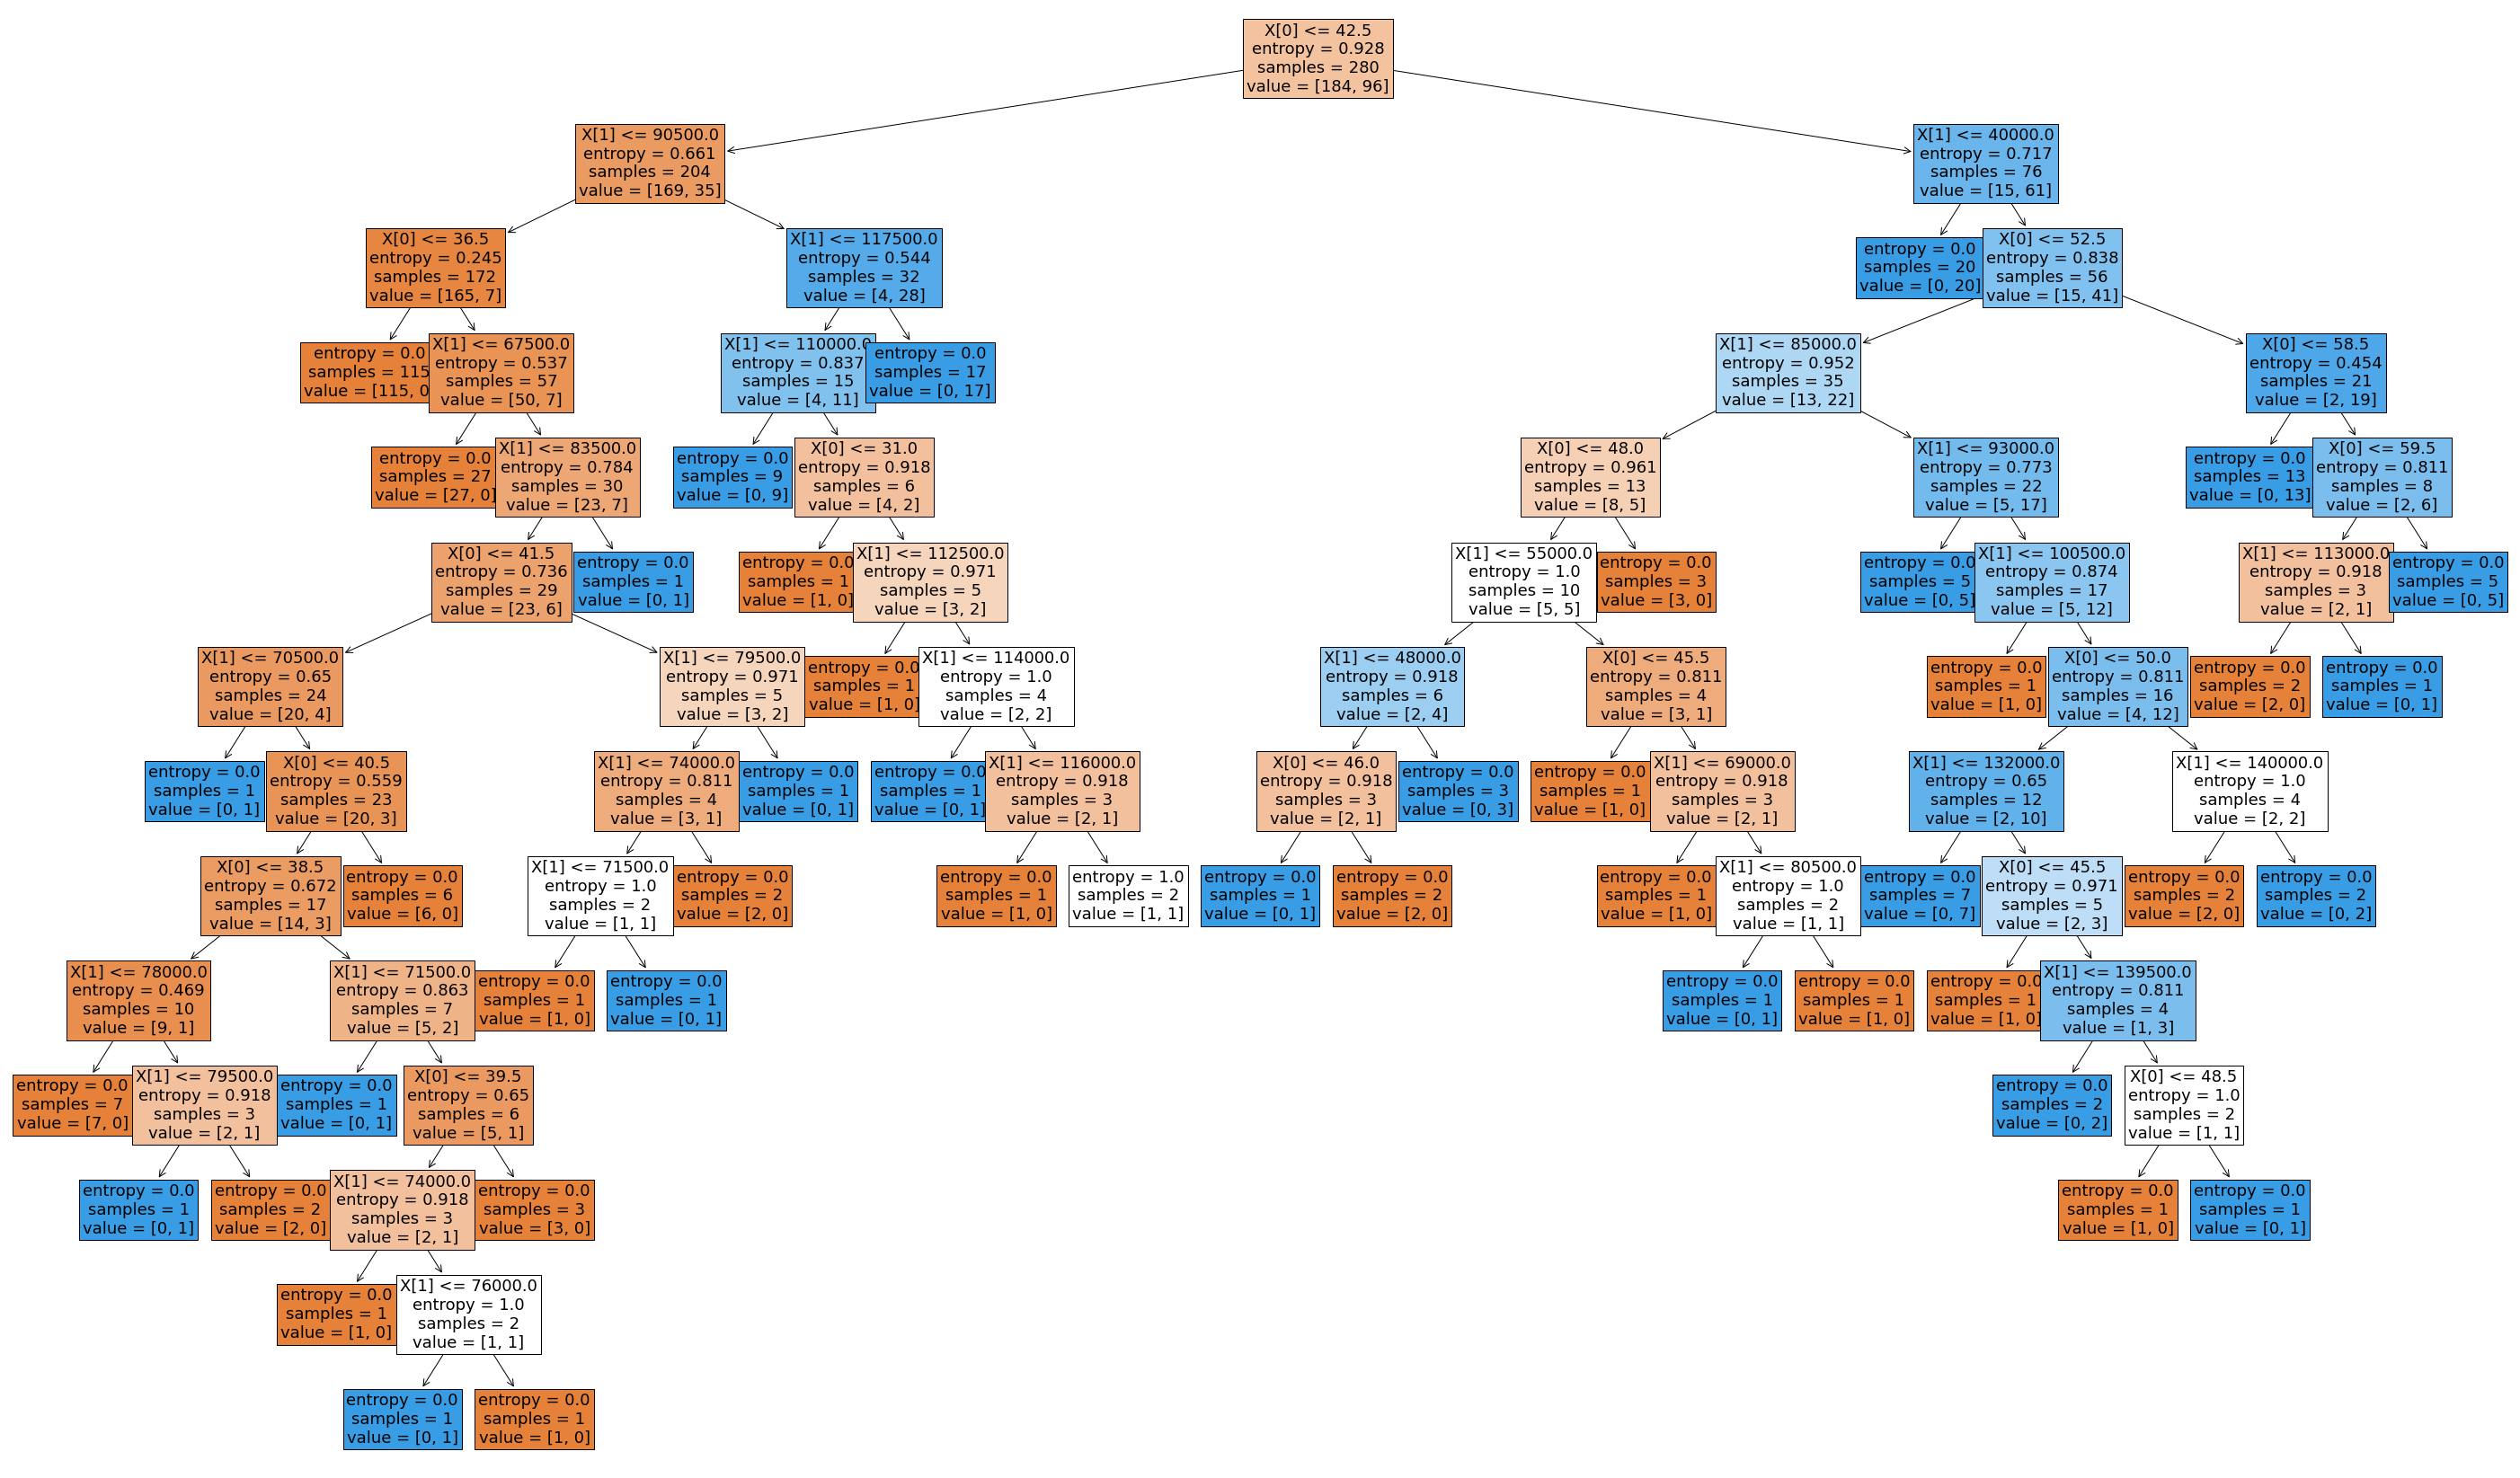

In [29]:
from sklearn import tree
fig = plt.figure(figsize=(50,30))
tree.plot_tree(classifier, filled=True, fontsize=18)

plt.show

**Visualising the Test set results**

In [31]:
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score

print('ROC score train', roc_auc_score(y_train, classifier.predict(X_train)))

ROC score train 0.9947916666666667


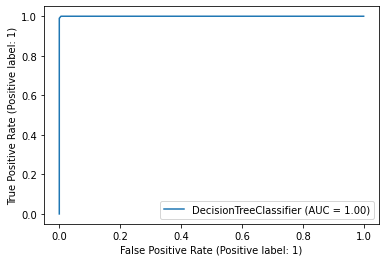

In [33]:
RocCurveDisplay.from_estimator(classifier,X_train,y_train)

In [34]:
print('ROC test', roc_auc_score(y_test, y_pred))

ROC test 0.8426114835324978


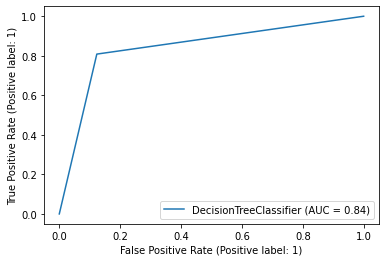

In [35]:
RocCurveDisplay.from_estimator(classifier,X_test,y_test)